In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as se

In [4]:
iris=pd.read_csv('./data/iris.csv')

<AxesSubplot:>

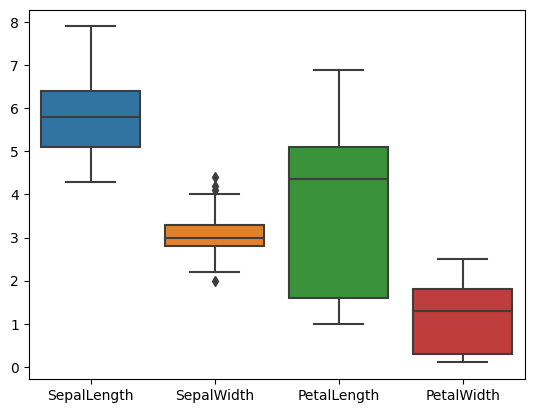

In [5]:
se.boxplot(iris)

<AxesSubplot:xlabel='Species', ylabel='SepalWidth'>

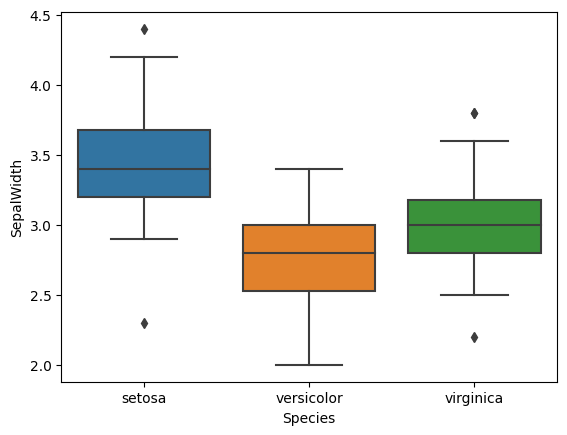

In [6]:
se.boxplot(iris, x='Species', y='SepalWidth')

In [7]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

In [10]:
iris=pd.read_csv('./data/iris.csv')

In [11]:
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test=train_test_split(iris, test_size=0.3, random_state=123)

In [14]:
list1=iris.columns[:-1]

In [15]:
minmax=MinMaxScaler().fit(train[list1])

In [19]:
train_m=train.copy()
test_m=test.copy()

train_m[list1]=minmax.transform(train[list1])
test_m[list1]=minmax.transform(test[list1])
train_m

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
114,0.424242,0.272727,0.694915,0.958333,virginica
136,0.575758,0.545455,0.779661,0.958333,virginica
53,0.333333,0.045455,0.508475,0.500000,versicolor
19,0.212121,0.727273,0.084746,0.083333,setosa
38,0.000000,0.363636,0.050847,0.041667,setosa
...,...,...,...,...,...
17,0.212121,0.590909,0.067797,0.083333,setosa
98,0.212121,0.136364,0.338983,0.416667,versicolor
66,0.363636,0.363636,0.593220,0.583333,versicolor
126,0.545455,0.272727,0.644068,0.708333,virginica


In [20]:
labelencoder=LabelEncoder().fit(train_m['Species'])

In [21]:
labelencoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
train_m['label']=labelencoder.transform(train_m['Species'])
train_m.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,label
114,0.424242,0.272727,0.694915,0.958333,virginica,2
136,0.575758,0.545455,0.779661,0.958333,virginica,2
53,0.333333,0.045455,0.508475,0.500000,versicolor,1


In [23]:
labelencoder.inverse_transform([0,1,2,1,2,0])

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa'], dtype=object)

In [32]:
# help(OneHotEncoder)

In [29]:
onehot=OneHotEncoder(sparse=False).fit(train_m[['Species']])
# onehot=OneHotEncoder().fit(train_m['Species'].values.reshape(-1,1))

In [31]:
onehot.categories_

[array(['setosa', 'versicolor', 'virginica'], dtype=object)]

In [36]:
train_m['v1']=0
train_m['v2']=0
train_m['v3']=0

In [37]:
train_m[['v1', 'v2', 'v3']]=onehot.transform(train_m[['Species']])

In [38]:
train_m.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,label,v1,v2,v3
114,0.424242,0.272727,0.694915,0.958333,virginica,2,0.0,0.0,1.0
136,0.575758,0.545455,0.779661,0.958333,virginica,2,0.0,0.0,1.0
53,0.333333,0.045455,0.508475,0.500000,versicolor,1,0.0,1.0,0.0
19,0.212121,0.727273,0.084746,0.083333,setosa,0,1.0,0.0,0.0
38,0.000000,0.363636,0.050847,0.041667,setosa,0,1.0,0.0,0.0


In [39]:
test_m2=test_m[test_m['Species'] != 'setosa'].reset_index(drop=True)

In [40]:
train_m2=train_m[test_m.columns]

In [41]:
train_m2.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
114,0.424242,0.272727,0.694915,0.958333,virginica
136,0.575758,0.545455,0.779661,0.958333,virginica


In [42]:
tr_m=pd.get_dummies(train_m2, columns=['Species'])
te_m=pd.get_dummies(test_m2, columns=['Species'])

In [43]:
tr_m.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species_setosa,Species_versicolor,Species_virginica
114,0.424242,0.272727,0.694915,0.958333,0,0,1
136,0.575758,0.545455,0.779661,0.958333,0,0,1


In [44]:
te_m.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species_versicolor,Species_virginica
0,0.575758,0.136364,0.661017,0.583333,1,0
1,0.727273,0.363636,0.762712,0.833333,0,1


In [45]:
train_m2['Species']=pd.Categorical(train_m2['Species'], categories=['versicolor','setosa','virginica'])
test_m2['Species']=pd.Categorical(test_m2['Species'], categories=['versicolor','setosa','virginica'])

In [46]:
tr_m=pd.get_dummies(train_m2, columns=['Species'])
te_m=pd.get_dummies(test_m2, columns=['Species'])

In [47]:
tr_m.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species_versicolor,Species_setosa,Species_virginica
114,0.424242,0.272727,0.694915,0.958333,0,0,1
136,0.575758,0.545455,0.779661,0.958333,0,0,1


In [48]:
te_m.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species_versicolor,Species_setosa,Species_virginica
0,0.575758,0.136364,0.661017,0.583333,1,0,0
1,0.727273,0.363636,0.762712,0.833333,0,0,1
